`Team 16
Thuật toán LinearRegression về dự đoán giá Vàng, Bạch Kim, Bạc`

In [1]:
#1. Cài đặt thư viện
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 14})
plt.style.use("ggplot")
import numpy as np 
import pandas as pd 
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [2]:
#2. Đọc file dữ liệu và xem dữ liệu
df = pd.read_csv('../SilverData.csv',parse_dates=True)
df

,Ngày,Lần cuối,Mở,Cao,Thấp,KL
0,21/5/2018,16.520,16.430,16.535,16.280,63.89K
1,22/5/2018,16.575,16.530,16.700,16.465,73.53K
2,23/5/2018,16.405,16.555,16.600,16.330,89.46K
3,24/5/2018,16.687,16.475,16.715,16.420,91.02K
4,25/5/2018,16.546,16.690,16.740,16.500,72.71K
...,...,...,...,...,...,...
1275,15/5/2023,24.175,24.030,24.270,23.945,0.17K
1276,16/5/2023,23.783,24.115,24.115,23.710,0.18K
1277,17/5/2023,23.789,23.830,23.940,23.650,0.18K
1278,18/5/2023,23.523,23.840,23.840,23.380,0.35K


In [3]:
#3. Xem các dữ liệu cơ bản của cảc thuộc tính
df.describe()

,Lần cuối,Mở,Cao,Thấp
count,1280.000000,1280.000000,1280.000000,1280.000000
mean,20.414323,20.428459,20.685217,20.134988
std,4.325552,4.335049,4.437082,4.203927
min,11.772000,11.975000,12.330000,11.640000
25%,16.223000,16.252500,16.388750,16.080000
50%,20.350500,20.312500,20.762500,19.987500
75%,24.250750,24.251250,24.580000,23.872500
max,29.418000,29.235000,30.350000,28.155000


In [4]:
#4. Kiểm tra dữ liệu rỗng
df.isnull().sum()

Ngày         0
Lần cuối     0
Mở           0
Cao          0
Thấp         0
KL          28
dtype: int64

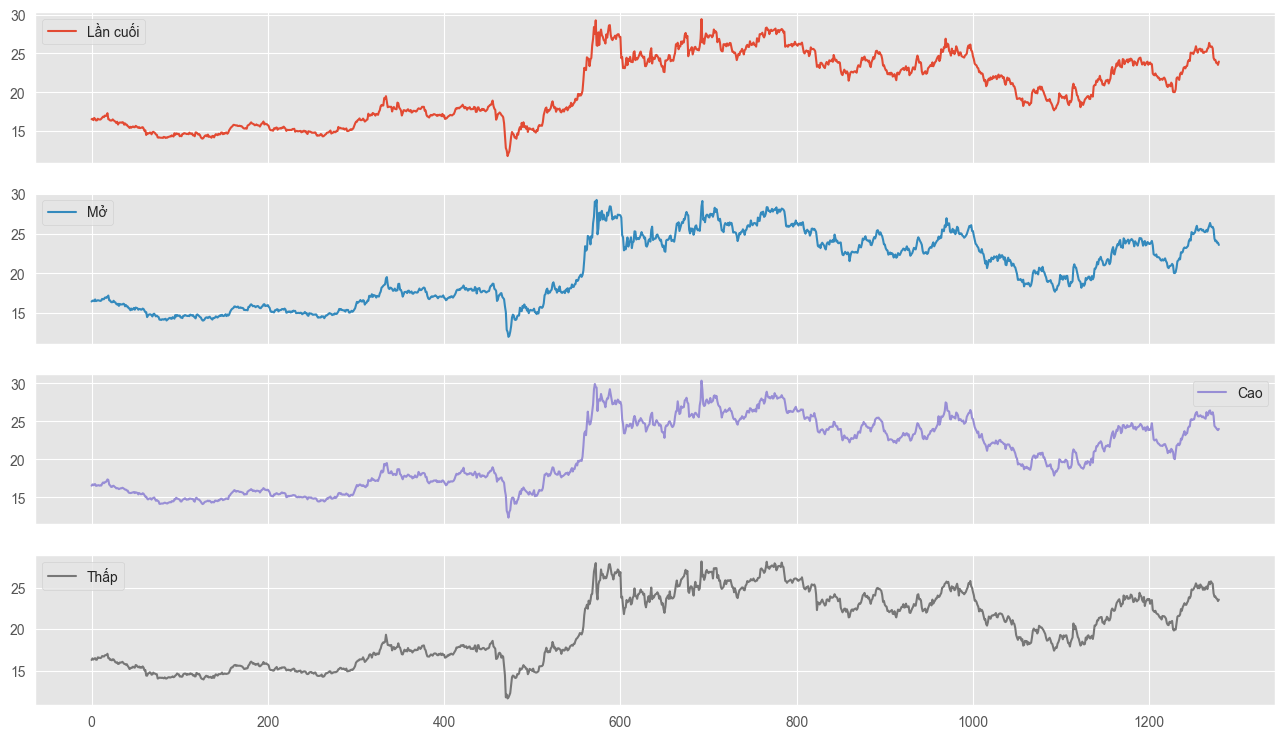

In [5]:
#5. Xem độ biến thiên của từng thuộc tính.
df.plot(legend=True,subplots=True, figsize = (16, 9))
plt.show()

In [6]:
#6. Chuyển dataset về cột Close để tiến hành tạo model
df = df[['Lần cuối']]
df

,Lần cuối
0,16.520
1,16.575
2,16.405
3,16.687
4,16.546
...,...
1275,24.175
1276,23.783
1277,23.789
1278,23.523


In [7]:
#7. Chia dữ liệu theo các tỷ lệ 7:2:1
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data_df = df[:train_size]
test_data_df = df[train_size:train_size+test_size]
val_data_df = df[train_size+test_size:]


In [8]:
#8. Đánh giá 
def deviation(test, pred):
  rmse= np.sqrt(mean_squared_error(test,pred))
  print(f"RMSE: {rmse:.2f}")
  mape= mean_absolute_percentage_error(test,pred)
  print(f"MAPE: {mape*100:.2f}%")
  mae = mean_absolute_error(test, pred)
  print(f"MAE: {mae:.2f}")

In [9]:
#9. the linear regression model
model = LinearRegression()
#Hàm visualize
def visualize(label ,pred, model_name):
  plt.figure(figsize=(12,8))
  plt.plot(label, label = 'Ground truth')
  plt.plot(label.index, pred, label='Predict')
  plt.title(model_name)
  plt.xlabel('Date')
  plt.ylabel('Closing Price')
  plt.legend()
  plt.show()

In [10]:
# 10. Quá trình Training
x_train = np.array(train_data_df.index).reshape(-1, 1)
y_train = np.array(train_data_df)
model.fit(x_train, y_train)


LinearRegression()

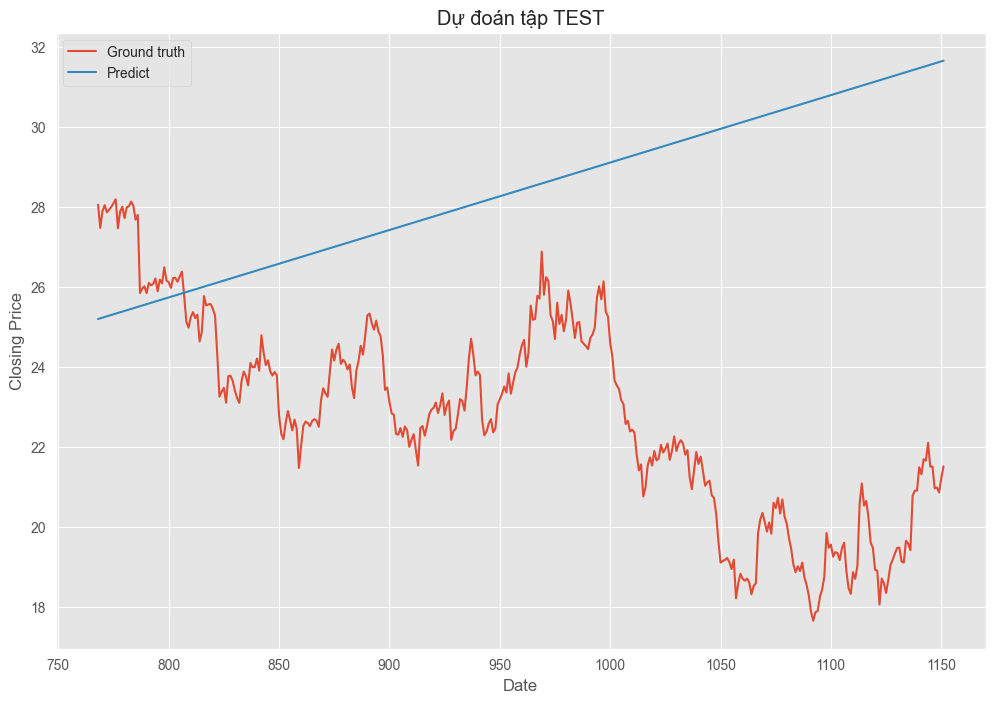

RMSE: 7.03
MAPE: 28.18%
MAE: 5.94


In [11]:
# 11. Quá trình testing 
x_test = np.array(test_data_df.index).reshape(-1, 1)
y_test = np.array(test_data_df)
test_predict = model.predict(x_test)
visualize(test_data_df, test_predict, 'Dự đoán tập TEST')
deviation(test_data_df, test_predict)

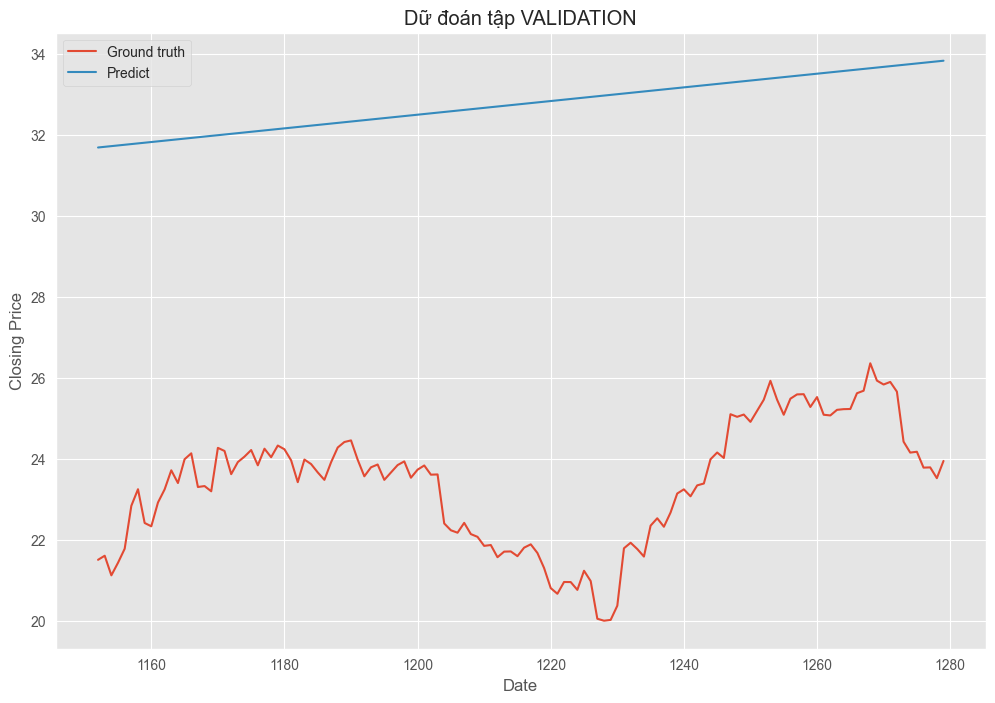

RMSE: 9.47
MAPE: 40.55%
MAE: 9.36


In [12]:
# 12. Quá trình Validate
x_val= np.array(val_data_df.index).reshape(-1, 1)
y_val = np.array(val_data_df)
val_predict =  model.predict(x_val)
visualize(val_data_df, val_predict, 'Dữ đoán tập VALIDATION')
deviation(val_data_df, val_predict)

In [13]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[[33.84138029]
 [33.85824097]
 [33.87510164]
 [33.89196232]
 [33.908823  ]
 [33.92568367]
 [33.94254435]
 [33.95940503]
 [33.9762657 ]
 [33.99312638]
 [34.00998706]
 [34.02684773]
 [34.04370841]
 [34.06056909]
 [34.07742976]
 [34.09429044]
 [34.11115111]
 [34.12801179]
 [34.14487247]
 [34.16173314]
 [34.17859382]
 [34.1954545 ]
 [34.21231517]
 [34.22917585]
 [34.24603653]
 [34.2628972 ]
 [34.27975788]
 [34.29661856]
 [34.31347923]
 [34.33033991]]


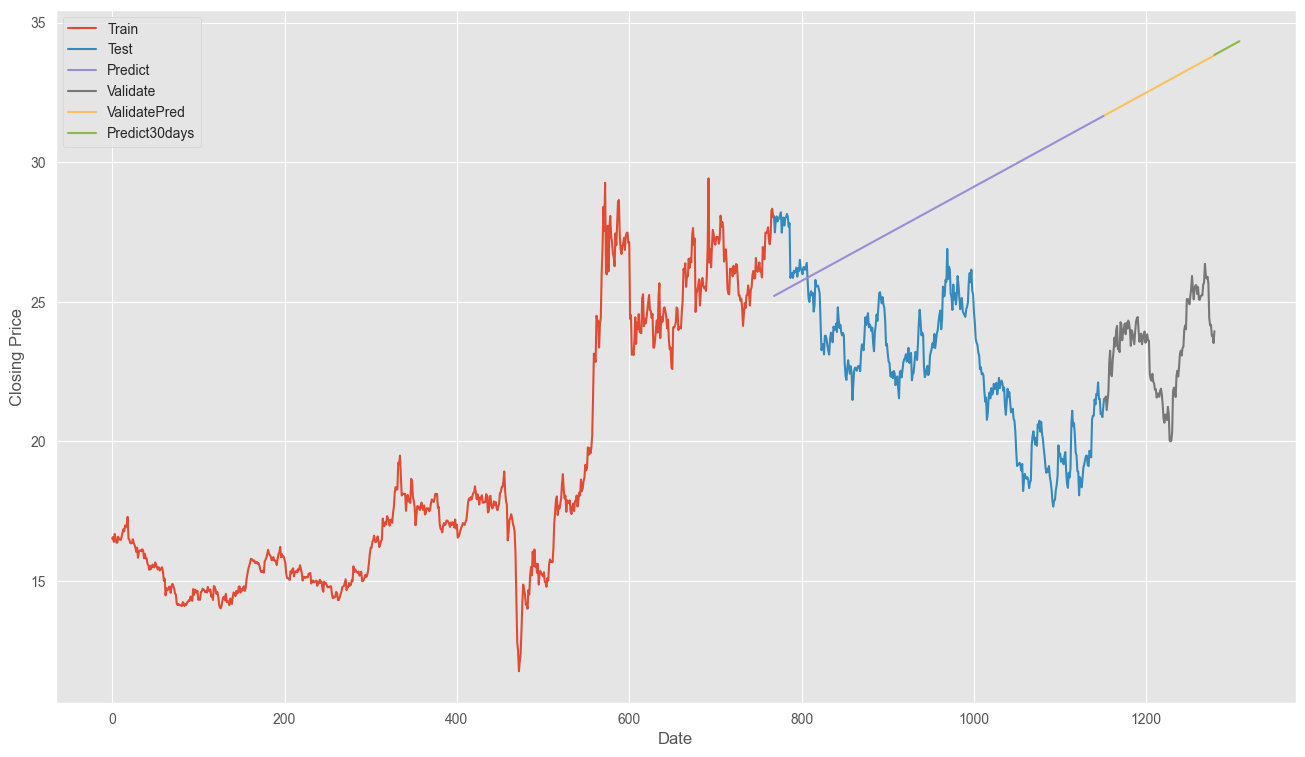

In [14]:
#Visualization
plt.figure(figsize=(16,9))
#train label
plt.plot(train_data_df, label = 'Train')

#test label and predict value
plt.plot(test_data_df, label = 'Test')
plt.plot(test_data_df.index, test_predict, label='Predict')

#val label and predict value
plt.plot(val_data_df, label = 'Validate')
plt.plot(val_data_df.index, val_predict, label='ValidatePred')

#predict next 30 days value
plt.plot(last_data,y_next_30_days, label = 'Predict30days')


# plt.title(model_name)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()